# **Principal Analysis Component (PCA)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load the data
df = pd.read_csv('data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
X = df.drop(['target'], axis=1)
y = df['target']

In [4]:
# Normalize the data
X = StandardScaler().fit_transform(X)

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# Explore the data
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

X_train:  (820, 13)
y_train:  (820,)


In [7]:
# PCA
pca = PCA(n_components=3)
pca.fit(X_train)

PCA(n_components=3)

In [8]:
# Incremental PCA
i_pca = IncrementalPCA(n_components=3, batch_size=10)
i_pca.fit(X_train)

IncrementalPCA(batch_size=10, n_components=3)

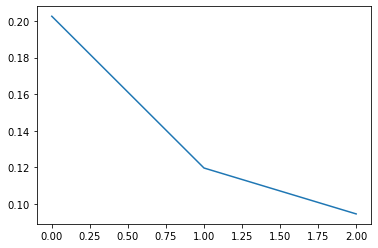

In [9]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show();

In [10]:
# Model with PCA
model = LogisticRegression(solver='lbfgs')
df_train = pca.transform(X_train)
df_test = pca.transform(X_test)
model.fit(df_train, y_train)
print("Score PCA: ", model.score(df_test, y_test))

Score PCA:  0.8439024390243902


In [11]:
# Model with Incremental PCA
df_train = i_pca.transform(X_train)
df_test = i_pca.transform(X_test)
model.fit(df_train, y_train)
print("Score Incremental PCA: ", model.score(df_test, y_test))

Score Incremental PCA:  0.848780487804878
